**Глава 8. Классификация изображений по содержанию**

Навигация к соседним тетрадям:
<!--NAVIGATION-->
<[Глава 7. Поиск изображений](7_searching_images.ipynb) | [Содержание](0_index.ipynb) | [Глава 9. Сегментация изображений](9_image_segmentation.ipynb)>

<a href="https://colab.research.google.com/github/mualal/computer-vision-with-python/blob/master/8_classifying_image_content.ipynb">    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Открыть и запустить в Google Colaboratory"></a>

In [1]:
import numpy as np
import pickle
import os

In [2]:
try:
    import google.colab, sys
    !git clone https://github.com/mualal/computer-vision-with-python.git
    sys.path.append('computer-vision-with-python')
    %cd computer-vision-with-python
except:
    import sys
    sys.path.append('..')

In [3]:
import imtools, knn, bayes

In [4]:
def create_normal(
    n=200,
    file_name='points_normal.pkl'
) -> None:
    class1 = 0.6 * np.random.randn(n, 2)
    class2 = 1.2 * np.random.randn(n, 2) + np.array([5, 1])
    labels = np.hstack((np.ones(n), -np.ones(n)))

    with open(os.path.join('images_output', file_name), 'wb') as f:
        pickle.dump(class1, f)
        pickle.dump(class2, f)
        pickle.dump(labels, f)


def create_ring(
    n=200,
    file_name='points_ring.pkl'
) -> None:
    class1 = 0.6 * np.random.randn(n, 2)
    r = 0.8 * np.random.randn(n, 1) + 5
    angle = 2 * np.pi * np.random.randn(n, 1)
    class2 = np.hstack((r * np.cos(angle), r * np.sin(angle)))
    labels = np.hstack((np.ones(n), -np.ones(n)))

    with open(os.path.join('images_output', file_name), 'wb') as f:
        pickle.dump(class1, f)
        pickle.dump(class2, f)
        pickle.dump(labels, f)


In [5]:
create_normal(
    file_name='points_normal_train.pkl'
)
create_normal(
    file_name='points_normal_test.pkl'
)

create_ring(
    file_name='points_ring_train.pkl'
)
create_ring(
    file_name='points_ring_test.pkl'
)

In [6]:
with open(os.path.join('images_output', 'points_normal_train.pkl'), 'rb') as f:
    class1 = pickle.load(f)
    class2 = pickle.load(f)
    labels = pickle.load(f)
model = knn.KnnClassifier(labels, np.vstack((class1, class2)))

with open(os.path.join('images_output', 'points_normal_test.pkl'), 'rb') as f:
    class1 = pickle.load(f)
    class2 = pickle.load(f)
    labels = pickle.load(f)
print(model.classify(class1[0]))

1.0


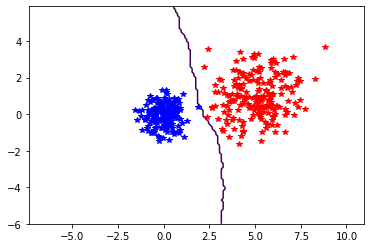

In [7]:
def classify(
    x,
    y,
    model=model
):
    return np.array([model.classify([xx, yy]) for xx, yy in zip(x, y)])

imtools.plot_2d_boundary([-6, 6, -6, 6], [class1, class2], classify, [1, -1])

In [8]:
with open(os.path.join('images_output', 'points_ring_train.pkl'), 'rb') as f:
    class1 = pickle.load(f)
    class2 = pickle.load(f)
    labels = pickle.load(f)
model = knn.KnnClassifier(labels, np.vstack((class1, class2)))

with open(os.path.join('images_output', 'points_ring_test.pkl'), 'rb') as f:
    class1 = pickle.load(f)
    class2 = pickle.load(f)
    labels = pickle.load(f)
print(model.classify(class1[0]))

1.0


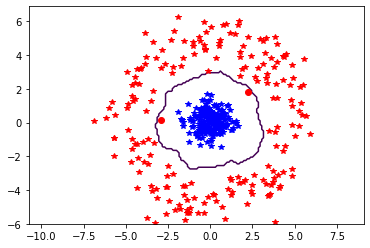

In [9]:
def classify(
    x,
    y,
    model=model
):
    return np.array([model.classify([xx, yy]) for xx, yy in zip(x, y)])

imtools.plot_2d_boundary([-6, 6, -6, 6], [class1, class2], classify, [1, -1])

In [10]:
with open(os.path.join('images_output', 'points_ring_train.pkl'), 'rb') as f:
    class1 = pickle.load(f)
    class2 = pickle.load(f)
    labels = pickle.load(f)
bc = bayes.BayesClassifier()
bc.train([class1, class2], [1, -1])

with open(os.path.join('images_output', 'points_ring_test.pkl'), 'rb') as f:
    class1 = pickle.load(f)
    class2 = pickle.load(f)
    labels = pickle.load(f)
print(bc.classify(class1[:10])[0])

[1 1 1 1 1 1 1 1 1 1]


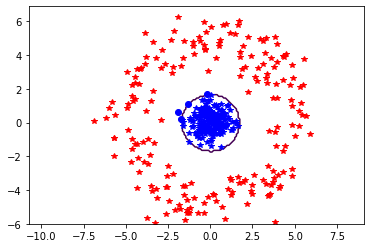

In [11]:
def classify(
    x,
    y,
    bc=bc
):
    points = np.vstack((x, y))
    return bc.classify(points.T)[0]

imtools.plot_2d_boundary([-6, 6, -6, 6], [class1, class2], classify, [1, -1])

<!--NAVIGATION-->
<[Глава 7. Поиск изображений](7_searching_images.ipynb) | [Содержание](0_index.ipynb) | [Глава 9. Сегментация изображений](9_image_segmentation.ipynb)>

<a href="https://colab.research.google.com/github/mualal/computer-vision-with-python/blob/master/8_classifying_image_content.ipynb">    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Открыть и запустить в Google Colaboratory"></a>